<a href="https://colab.research.google.com/github/rfprates/cancelamento_clientes/blob/main/data_preparation_case_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case - Data Preparation de um dataset para utilizá-lo na classificação de churn dos clientes

## Introdução

Uma empresa fictícia de telecomunicações dos Estados Unidos tem uma base de dados contendo diversas informações a respeito de seus clientes, desde a localização deles até com qual frequência utilizam a internet para assistir filmes. A partir disto, a empresa deseja que, após ser feita toda a limpeza e organização dados disponíveis, seja possível criar uma métrica de classificação chamada "churn", que indica o quanto a empresa perdeu de clientes. Ou seja, clientes classificados como churn são considerados "ex-clientes", não compram ou assinam mais os produtos da compania em questão.

## Objetivo do projeto

Projeto de data cleaning e data wrangling, com o objetivo de preparar uma base de dados que será utilizada para classificação de churn pela empresa.

## Settings

### Bibliotecas

Importando-se as bibliotecas necessárias para resolução deste caso.

In [ ]:
!pip install pandas-profiling

In [ ]:
import numpy as np
import pandas as pd

# lib para relatório automatizado
from pandas_profiling import ProfileReport

# libs de visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

# libs ScikitLearn para tratamento das features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

### Load dataset

Carregando-se o dataset da empresa,

In [3]:
customer = pd.read_excel('Telco_customer_churn.xlsx')

Exibindo o dataset,

In [4]:
display(customer)

CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
0     33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1      34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2     34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3     34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4     34.039224, -118.266293  34.039224 -118.266293    Male  ...   
...                      ...        ...         ...     ...  ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

             Tech Support         Streaming TV     Streaming Movies  \
0                      No                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                  Yes   
3                     Yes                  Yes                  Yes   
4                      No                  Yes                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                  Yes                  Yes                  Yes   
7040                   No                  Yes                  Yes   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

     Monthly Charges Total Charges Churn Value  CLTV  
0              53.85        108.15           1  3239  
1              70.70        151.65           1  2701  
2              99.65         820.5           1  5372  
3             104.80       3046.05           1  5003  
4             103.70        5036.3           1  5340  
...              ...           ...         ...   ...  
7038           21.15        1419.4           0  5306  
7039           84.80        1990.5           0  2140  
7040          103.20        7362.9           0  5560  
7041           29.60

Converteu-se a coluna "Customer ID" como sendo o index do dataset, visto que ela só fornece os códigos de cada cliente.

In [5]:
customer = pd.read_excel('Telco_customer_churn.xlsx', index_col=0)

In [6]:
customer.head()

Count        Country       State         City  Zip Code  \
CustomerID                                                            
3668-QPYBK      1  United States  California  Los Angeles     90003   
9237-HQITU      1  United States  California  Los Angeles     90005   
9305-CDSKC      1  United States  California  Los Angeles     90006   
7892-POOKP      1  United States  California  Los Angeles     90010   
0280-XJGEX      1  United States  California  Los Angeles     90015   

                          Lat Long   Latitude   Longitude  Gender  \
CustomerID                                                          
3668-QPYBK  33.964131, -118.272783  33.964131 -118.272783    Male   
9237-HQITU   34.059281, -118.30742  34.059281 -118.307420  Female   
9305-CDSKC  34.048013, -118.293953  34.048013 -118.293953  Female   
7892-POOKP  34.062125, -118.315709  34.062125 -118.315709  Female   
0280-XJGEX  34.039224, -118.266293  34.039224 -118.266293    Male   

           Senior Citizen  ... Tech Support Streaming TV  Streaming Movies  \
CustomerID                 ...                                               
3668-QPYBK             No  ...           No           No                No   
9237-HQITU             No  ...           No           No                No   
9305-CDSKC             No  ...           No          Yes               Yes   
7892-POOKP             No  ...          Yes          Yes               Yes   
0280-XJGEX             No  ...           No          Yes               Yes   

                  Contract Paperless Billing             Payment Method  \
CustomerID                                                                
3668-QPYBK  Month-to-month               Yes               Mailed check   
9237-HQITU  Month-to-month               Yes           Electronic check   
9305-CDSKC  Month-to-month               Yes           Electronic check   
7892-POOKP  Month-to-month               Yes           Electronic check   
0280-XJGEX  Month-to-month               Yes  Bank transfer (automatic)   

           Monthly Charges Total Charges Churn Value  CLTV  
CustomerID                                                  
3668-QPYBK           53.85        108.15           1  3239  
9237-HQITU           70.70        151.65           1  2701  
9305-CDSKC           99.65         820.5           1  5372  
7892-POOKP          104.80       3046.05           1  5003  
0280-XJGEX          103.70        5036.3           1  5340  

[5 rows x 29 columns]

## EDA

### Relatório automatizado

Utilizando a função ProfileReport, importada anteriormente, gera-se um relatório completo com análises descritivas e exploratórias de cada uma das colunas presentes no dataset. Isto é realizada conforme segue abaixo.

In [7]:
ProfileReport(customer)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Dados ausentes e duplicados

Avaliando-se o relatório gerado acima, logo na primeira tabela de Overview tem-se as informações relacionadas a quantidade de linhas duplicadas, quantidade de dados nulos. Conforme ali descrito não tem dados ausentes e nem linhas duplicadas no dataset.
Verificando estes aspectos nas linhas de código abaixo.

In [8]:
# linhas duplicadas
customer.duplicated().sum()

0

Somando todas as linhas duplicadas do dataset tem-se um resultado de 0, o que condiz com a avaliação do relatório.

Analisando-se agora os dados ausentes,

In [9]:
# dados nulos
customer.isna().sum()

Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64

O resultado acima também pode ser verificado no final da página de Overview do relatório. Lá consta um gráfico de Missing_values para todas as colunas presentes no dataset

#### Alerts

Importante observar ainda neste relatório, que temos descritos alguns problemas observados na distribuição dos dados na aba "Alerts", que está no início do relatório.

##### Dados Constantes

Fazendo uma observação nos alertas descritos, temos as colunas "Count", "Country" e "State" com dados constantes, ou seja, o mesmo dado em todas as 7043 linhas de dataset. Este tipo de coluna prejudica muito as medições do modelo de machine learning, além de não agregar nenhuma informação relevante ao problema de negócio em questão. Portanto, é conveniente removê-las do dataset.

In [10]:
customer.drop(columns = ['Count', 'Country', 'State'], inplace = True)

##### Dados Geográficos

Há neste dataset diversas colunas com informações referentes a localização dos clientes. Portanto, pode-se analisar quais delas contém dados relevantes para a análise em questão.

Latitude e Longitude podem oferecer dados importantes do tipo de bairro em que o cliente vive, distância que precisa se locomover para chegar a alguma sede da empresa. Com isso, pode-se agrupar novos datasets a este, portanto vamos manter estas duas colunas.

Já as demais colunas como "Zip Code", "City" e "Lat Long" podem ser excluídas pois apresentam infos duplicadas e irrelevantes. Além disso, a coluna de cidades tem uma granularidade de dados alta, ou seja, temos muitas cidades diferentes, o que também interfere em um possível modelo de machine learning. Seria aconselhado, como seja necessário manter esta coluna no dataset, manter somente as cidades que são mais frequentes e agrupar as demais em um único grupo "outras", por exemplo.

In [11]:
customer.drop(columns = ['City', 'Zip Code', 'Lat Long'], inplace = True)

Observando-se as colunas restantes

In [12]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [13]:
customer.columns

Index(['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'CLTV'],
      dtype='object')

##### Coluna "Total Charges"

Ainda dentro da aba de "Alerts", tem-se uma mensagem dizendo que a coluna "Total Charges" não tem um formato suportado. Primeiro, avaliou-se a "cara" dos dados desta coluna.

In [14]:
customer['Total Charges']

CustomerID
3668-QPYBK     108.15
9237-HQITU     151.65
9305-CDSKC      820.5
7892-POOKP    3046.05
0280-XJGEX     5036.3
               ...   
2569-WGERO     1419.4
6840-RESVB     1990.5
2234-XADUH     7362.9
4801-JZAZL     346.45
3186-AJIEK     6844.5
Name: Total Charges, Length: 7043, dtype: object

De cara percebe-se que se tratam dos encargos totais do cliente, que deveriam ser dados numéricos, contudo estão classificados como do tipo "object". Isto pode significar que existem mais de um tipo de dado dentro desta coluna.

In [15]:
customer['Total Charges'].map(lambda x: type(x)).unique()

array([<class 'float'>, <class 'int'>, <class 'str'>], dtype=object)

Pelo resultado acima, tem-se que a coluna "Total Charges" apresenta 3 tipos de dados: float, int e string.

Verificou-se quais linhas desta coluna apresentam dados do tipo string.

In [16]:
customer[customer['Total Charges'].map(lambda x: isinstance(x, str))][['Total Charges']]

Total Charges
CustomerID              
4472-LVYGI              
3115-CZMZD              
5709-LVOEQ              
4367-NUYAO              
1371-DWPAZ              
7644-OMVMY              
3213-VVOLG              
2520-SGTTA              
2923-ARZLG              
4075-WKNIU              
2775-SEFEE

Avaliando-se uma destas linhas em específico,

In [17]:
customer.loc['4472-LVYGI', 'Total Charges']

' '

Percebe-se que os dados do tipo string são na verdade um espaço " ". Portanto, para resolver este problema, atribuíu-se o valor 0 para todos os dados do tipo string desta coluna e converteu-se os dados do tipo inteiro para float, conforme segue abaixo.

In [18]:
str_index = customer['Total Charges'].map(lambda x: isinstance(x, str))
int_index = customer['Total Charges'].map(lambda x: isinstance(x, int))

customer.loc[str_index, 'Total Charges'] = 0.0
customer.loc[int_index, 'Total Charges'] = customer.loc[int_index, 'Total Charges'].astype(float)

Agora é possível converter os dados da coluna "Total Charges" para o tipo float

In [19]:
customer['Total Charges'] = customer['Total Charges'].astype(float)

In [20]:
customer.dtypes

Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
CLTV                   int64
dtype: object

### Outliers

Para avaliar a existência de outliers neste dataset, plotou-se gráficos do tipo boxplot para todas as features numéricas presentes. Para tal, primeiro selecionou-se todas as colunas com dados numéricos, salvando-as na variável numeric_cols. Após isso, utiliza-se da função scale() da biblioteca ScikitLearn, com o objetivo de normalizar os valores. Feito estes tratamentos, tem-se os resultados abaixo.

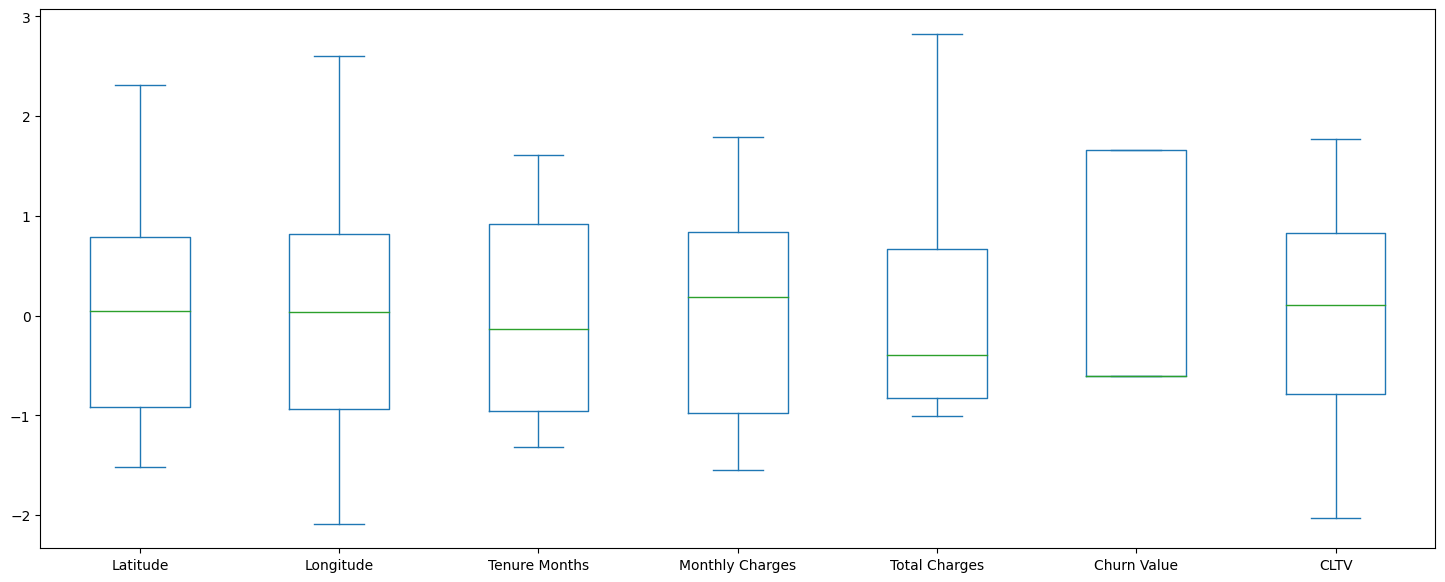

In [21]:
# selecionando as colunas com dados numéricos
numeric_cols = customer.select_dtypes('number').columns

# normalizando os valores
normalized_df = customer[numeric_cols].apply(scale)

# plotando o gráfico
normalized_df.plot.box(figsize=(18,7));

Como é possível avaliar nos gráficos acima, nenhuma das colunas numéricas deste dataset tem dados chamados "outliers", ou seja, dados que estão muito fora da curva e que possam depreciar as avaliações estatísticas e também prejudicar o treino do modelo posteriormente.

### Categorical Encoding

Agora, pode ser verificado qual das features tem mais relação com o nosso "target" que é os dados de Churn Value.

Para tal, primeiro separou-se o dataset original em dois, um com os dados da coluna target e o outro com os dados das demais colunas.

In [22]:
customer_features = customer.drop(columns = 'Churn Value')
target = customer['Churn Value']

Feito isso, seleciona-se somente o dataset das features e separamos em dois outros grupos: o primeiro somente com colunas com dados numéricos e outro com as colunas categóricas.

In [23]:
numerical_features = customer_features.select_dtypes('number').columns
categorical_features = customer_features.select_dtypes(exclude = 'number').columns

A partir deste ponto são feitas as as transformações de pré processamento dos dados, utilizando as ferramentes importadas anteriormente da biblioteca Scikit Learn.

Para os dados numéricos, utilizou-se da função StandarScaler no qual transforma os dados de tal forma que respeitem aproximadamente uma distribuição normal centrada em 0.

Já os dados categóricos, foram feitas duas abordagens diferentes. A primeira utilizando OneHotEncoder, onde cada dado diferente presente irá originar uma nova coluna prenchida apenas por 1 ou 0, onde 1 significa verdadeiro e 0 falso.
Este tipo de conversão é muito útil para qualquer tipo de modelo, contudo é necessário uma ressalva em colunas com uma granularidade muito alta (muitos dados diferentes), fazendo com que sejam criadas muitas colunas novas. A segunda abordagem é utilizando o OrdinalEncoder, onde cada dado diferente presente em cada uma das colunas é transformado em um número inteiro. Este tipo de pré processamento não é muito recomendado para modelos de regressão.

Abaixo seguem cada uma das abordagens de pré processamento.

#### OneHotEncoder

Utlizando-se a função ColumnTransformer foram passados as funções de transformação e os respectivos DataFrames a serem manipulados.

In [27]:
preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numerical_features),
    ('categorical_preprocessing', OneHotEncoder(), categorical_features)
])

Treinando com o dataset de features,

In [28]:
preprocessing.fit(customer_features)

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

Criando um novo DataFrame com os dados já transformados,

In [29]:
customer_preprocessed = pd.DataFrame(data = preprocessing.transform(customer_features), columns = preprocessing.get_feature_names_out())
customer_preprocessed.head()

numerical_preprocessing__Latitude  numerical_preprocessing__Longitude  \
0                          -0.944111                            0.707268   
1                          -0.905362                            0.691215   
2                          -0.909951                            0.697457   
3                          -0.904204                            0.687374   
4                          -0.913530                            0.710276   

   numerical_preprocessing__Tenure Months  \
0                               -1.236724   
1                               -1.236724   
2                               -0.992402   
3                               -0.177995   
4                                0.677133   

   numerical_preprocessing__Monthly Charges  \
0                                 -0.362660   
1                                  0.197365   
2                                  1.159546   
3                                  1.330711   
4                                  1.294151   

   numerical_preprocessing__Total Charges  numerical_preprocessing__CLTV  \
0                               -0.958066                      -0.981675   
1                               -0.938874                      -1.436462   
2                               -0.643789                       0.821409   
3                                0.338085                       0.509483   
4                                1.216150                       0.794358   

   categorical_preprocessing__Gender_Female  \
0                                       0.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       0.0   

   categorical_preprocessing__Gender_Male  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   

   categorical_preprocessing__Senior Citizen_No  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   

   categorical_preprocessing__Senior Citizen_Yes  ...  \
0                                            0.0  ...   
1                                            0.0  ...   
2                                            0.0  ...   
3                                            0.0  ...   
4                                            0.0  ...   

   categorical_preprocessing__Streaming Movies_Yes  \
0                                              0.0   
1                                              0.0   
2                                              1.0   
3                                              1.0   
4                                              1.0   

   categorical_preprocessing__Contract_Month-to-month  \
0                                                1.0    
1                                                1.0    
2                                                1.0    
3                                                1.0    
4                                                1.0    

   categorical_preprocessing__Contract_One year  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   categorical_preprocessing__Contract_Two year  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   categorical_preprocessing__Paperless Billing_N

#### OrdinalEncoder

Neste caso, criou-se um DataFrame novo customer_preprocessed_second, que é uma cópia do original, onde nas features categóricas aplicou-se a função OrdinalEncoder e nas numéricas a função StandardScaler.

In [45]:
customer_preprocessed_second = customer.copy()

categorical_encoder = OrdinalEncoder()
numerical_encoder = StandardScaler()

customer_preprocessed_second[categorical_features] = categorical_encoder.fit_transform(customer_preprocessed_second[categorical_features])
customer_preprocessed_second[numerical_features] = numerical_encoder.fit_transform(customer_preprocessed_second[numerical_features])

customer_preprocessed_second.head()

Latitude  Longitude  Gender  Senior Citizen  Partner  Dependents  \
CustomerID                                                                     
3668-QPYBK -0.944111   0.707268     1.0             0.0      0.0         0.0   
9237-HQITU -0.905362   0.691215     0.0             0.0      0.0         1.0   
9305-CDSKC -0.909951   0.697457     0.0             0.0      0.0         1.0   
7892-POOKP -0.904204   0.687374     0.0             0.0      1.0         1.0   
0280-XJGEX -0.913530   0.710276     1.0             0.0      0.0         1.0   

            Tenure Months  Phone Service  Multiple Lines  Internet Service  \
CustomerID                                                                   
3668-QPYBK      -1.236724            1.0             0.0               0.0   
9237-HQITU      -1.236724            1.0             0.0               1.0   
9305-CDSKC      -0.992402            1.0             2.0               1.0   
7892-POOKP      -0.177995            1.0             2.0               1.0   
0280-XJGEX       0.677133            1.0             2.0               1.0   

            ...  Tech Support  Streaming TV  Streaming Movies  Contract  \
CustomerID  ...                                                           
3668-QPYBK  ...           0.0           0.0               0.0       0.0   
9237-HQITU  ...           0.0           0.0               0.0       0.0   
9305-CDSKC  ...           0.0           2.0               2.0       0.0   
7892-POOKP  ...           2.0           2.0               2.0       0.0   
0280-XJGEX  ...           0.0           2.0               2.0       0.0   

            Paperless Billing  Payment Method  Monthly Charges  Total Charges  \
CustomerID                                                                      
3668-QPYBK                1.0             3.0        -0.362660      -0.958066   
9237-HQITU                1.0             2.0         0.197365      -0.938874   
9305-CDSKC                1.0             2.0         1.159546      -0.643789   
7892-POOKP                1.0             2.0         1.330711       0.338085   
0280-XJGEX                1.0             0.0         1.294151       1.216150   

            Churn Value      CLTV  
CustomerID                         
3668-QPYBK            1 -0.981675  
9237-HQITU            1 -1.436462  
9305-CDSKC            1  0.821409  
7892-POOKP            1  0.509483  
0280-XJGEX            1  0.794358  

[5 rows x 23 columns]